# Customer Churn and Revenue Prediction Model

## 1. Purpose

This model is designed to:

- Identify which customers are likely to churn over the next quarter in order to enable a targeted and tailored marketing campaigns to prevent the customer churning.

### Importance of Churn Prevention

Customer churn represents a significant cost to businesses — not only through lost revenue but also through the increased expense of acquiring new customers. This model helps mitigate churn by predicting which customers are at risk of not purchasing within the next quarter- which will be used as the definition of churned.

With this insight, marketing can automate targetted discount on products which the customer has previously purchase to improve retention rates. Additionally, the model estimates each customer’s expected spend over the same period, enhancing the cost-effectiveness of customer retention efforts.

### Model Development & Approach

The model was built using transactional data from a UK-based e-commerce store and follows a two-stage regression approach:

1. **Churn Prediction (Logistic Regression)**  
   Estimates the probability of a customer churning within the next three months.

2. **Future Spend Prediction (Linear Regression)**  
   For customers predicted to remain active, forecasts their total spending over the same period.

Currently, the model uses **Recency, Frequency, and Monetary (RFM)** features for its predictions. Future iterations will incorporate additional features following the initial deployment.

By leveraging this model, the marketing team can better identify high-value customers at risk of churning and "save them".

# Establishing the Environment/ Loading the data
Sci Kit learn will be the package used for the ML modelling and SeaBorne, Matplotlib for the graphing. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import dataframe_image as dfi
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime
from dateutil.relativedelta import relativedelta
from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


### Loading data 
The transactional data used for the model is from 01/12/2010 and 09/12/2011 and is from a UK-based and registered non-store online retailer. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

In [2]:
transactions = pd.read_csv('Ecommerce_data.csv', encoding='latin')
transactions.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 8:26,3.39,17850.0,United Kingdom


# 3. Data Exploration / cleaning 
Intial analysis to understand the quality of the data and the current patterns of transactions

In [3]:
transactions.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [4]:

# Filtering any abnormal entries
print(transactions.size)
transactions=transactions.loc[transactions['UnitPrice']>0]
transactions=transactions.loc[transactions['Quantity']>0]
transactions=transactions.loc[transactions['CustomerID'].notnull()]



print(transactions.size)



# formatting the date column
transactions['InvoiceDate']=pd.to_datetime(transactions['InvoiceDate'])
transactions['month'] = transactions['InvoiceDate'].dt.month
transactions['year'] = transactions['InvoiceDate'].dt.year



# Time of transation is betewwn 2010-12 to 2011-12
transactions['InvoiceDate']=pd.to_datetime(transactions['InvoiceDate'])
print(transactions['InvoiceDate'].min())
print(transactions['InvoiceDate'].max())

transactions.head()

4335272
3183072
2010-12-01 08:26:00
2011-12-09 12:50:00


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010


In [5]:
transactions.loc[transactions['CustomerID']==12348.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year
34083,539318,84992,72 SWEETHEART FAIRY CAKE CASES,72,2010-12-16 19:09:00,0.55,12348.0,Finland,12,2010
34084,539318,22951,60 CAKE CASES DOLLY GIRL DESIGN,72,2010-12-16 19:09:00,0.55,12348.0,Finland,12,2010
34085,539318,84991,60 TEATIME FAIRY CAKE CASES,24,2010-12-16 19:09:00,0.55,12348.0,Finland,12,2010
34086,539318,84991,60 TEATIME FAIRY CAKE CASES,120,2010-12-16 19:09:00,0.42,12348.0,Finland,12,2010
34087,539318,21213,PACK OF 72 SKULL CAKE CASES,24,2010-12-16 19:09:00,0.55,12348.0,Finland,12,2010
34088,539318,21213,PACK OF 72 SKULL CAKE CASES,120,2010-12-16 19:09:00,0.42,12348.0,Finland,12,2010
34089,539318,22616,PACK OF 12 LONDON TISSUES,72,2010-12-16 19:09:00,0.29,12348.0,Finland,12,2010
34090,539318,21981,PACK OF 12 WOODLAND TISSUES,144,2010-12-16 19:09:00,0.29,12348.0,Finland,12,2010
34091,539318,21982,PACK OF 12 SUKI TISSUES,144,2010-12-16 19:09:00,0.29,12348.0,Finland,12,2010
34092,539318,21725,SWEETIES STICKERS,48,2010-12-16 19:09:00,0.85,12348.0,Finland,12,2010


In [6]:
transactions.isnull().sum(axis = 0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
month          0
year           0
dtype: int64

## Sales
Around 700-800k of sales between January - August which increases to $1 million for September to December 

         Date  month  year        Sales
0  2010-12-01     12  2010   572713.890
1  2011-01-01      1  2011   569445.040
2  2011-02-01      2  2011   447137.350
3  2011-03-01      3  2011   595500.760
4  2011-04-01      4  2011   469200.361
5  2011-05-01      5  2011   678594.560
6  2011-06-01      6  2011   661213.690
7  2011-07-01      7  2011   600091.011
8  2011-08-01      8  2011   645343.900
9  2011-09-01      9  2011   952838.382
10 2011-10-01     10  2011  1039318.790
11 2011-11-01     11  2011  1161817.380
12 2011-12-01     12  2011   518192.790


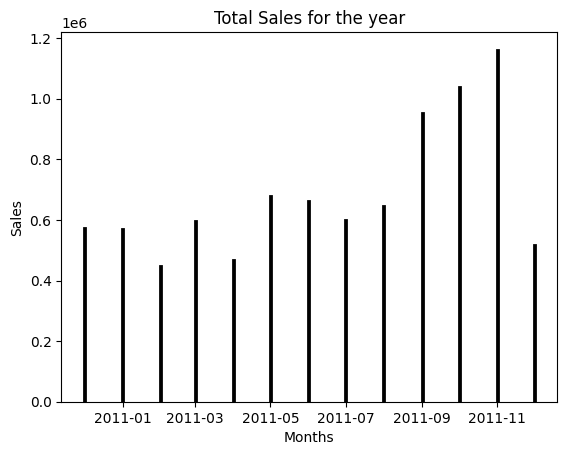

In [7]:
# Sales accross the year
transactions['Sales']=transactions['Quantity']*transactions['UnitPrice']

total_monthly_sales=transactions.groupby(['month','year']).agg({'Sales':'sum'})
total_monthly_sales=total_monthly_sales.reset_index()
total_monthly_sales['Date'] = pd.to_datetime(total_monthly_sales[['year', 'month']].assign(day=1))
total_monthly_sales=total_monthly_sales.groupby(['Date']).agg('sum').reset_index()

sum_monthly_sales=total_monthly_sales[['Sales','Date']]
print(total_monthly_sales)


plt.bar(sum_monthly_sales['Date'],sum_monthly_sales['Sales'],linewidth=2.0,edgecolor='black')
plt.title('Total Sales for the year')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

In [8]:
sum_monthly_sales

,Sales,Date
0,572713.890,2010-12-01
1,569445.040,2011-01-01
2,447137.350,2011-02-01
3,595500.760,2011-03-01
4,469200.361,2011-04-01
5,678594.560,2011-05-01
6,661213.690,2011-06-01
7,600091.011,2011-07-01
8,645343.900,2011-08-01
9,952838.382,2011-09-01


In [9]:
sum_monthly_sales['Sales']

0      572713.890
1      569445.040
2      447137.350
3      595500.760
4      469200.361
5      678594.560
6      661213.690
7      600091.011
8      645343.900
9      952838.382
10    1039318.790
11    1161817.380
12     518192.790
Name: Sales, dtype: float64

## Customers
### There are 4338 unique customers and a total of 397884 transactions with Customer IDs and 132220 without CustomerID. There are a total of 530,104 transactions


In [10]:
print("Unique IDs:", transactions['CustomerID'].nunique())
print("Transactions with ID's:",transactions['CustomerID'].count())
print("Transactions without IDs:",(transactions['CustomerID'].isnull()).sum())
Unique_Customer= transactions['CustomerID'].nunique()



Unique IDs: 4338
Transactions with ID's: 397884
Transactions without IDs: 0


## Revenue by Customer
### There is a large tail on the distribution of revenue. With the majority of customers spending less then $10,000 at the retailer and a handful that spend between 100,000 - 250,000

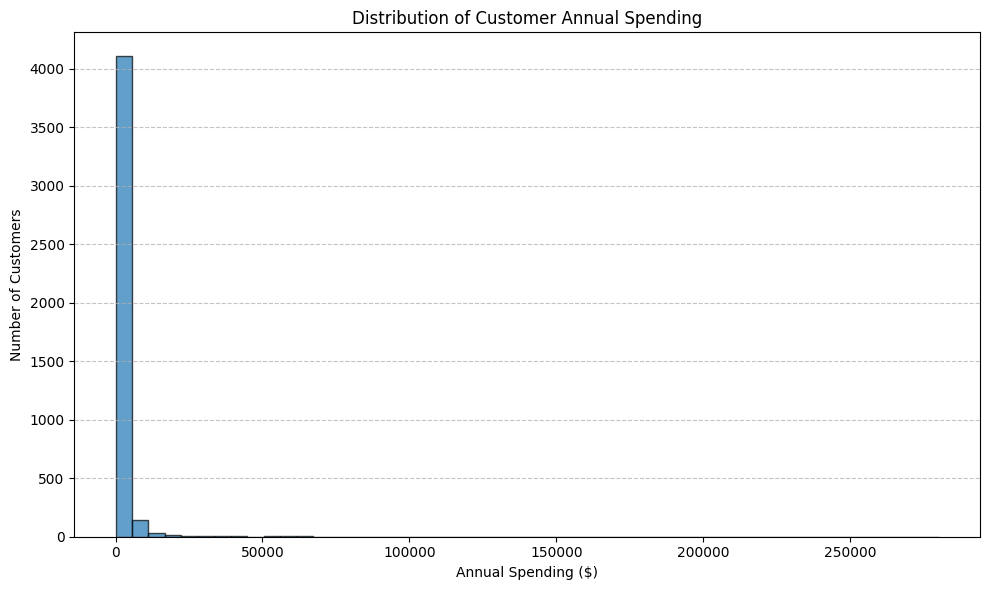

In [11]:
cust_trans=transactions[['Sales','CustomerID']].groupby(['CustomerID']).agg('sum').sort_values('Sales')
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(cust_trans, bins=50, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Annual Spending ($)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Annual Spending')

# Add grid for better readability
plt.grid(axis='y', alpha=0.75, linestyle='--')

plt.tight_layout()
plt.show()

In [12]:
cust_trans.loc[cust_trans['Sales']>10000].count()

Sales    104
dtype: int64

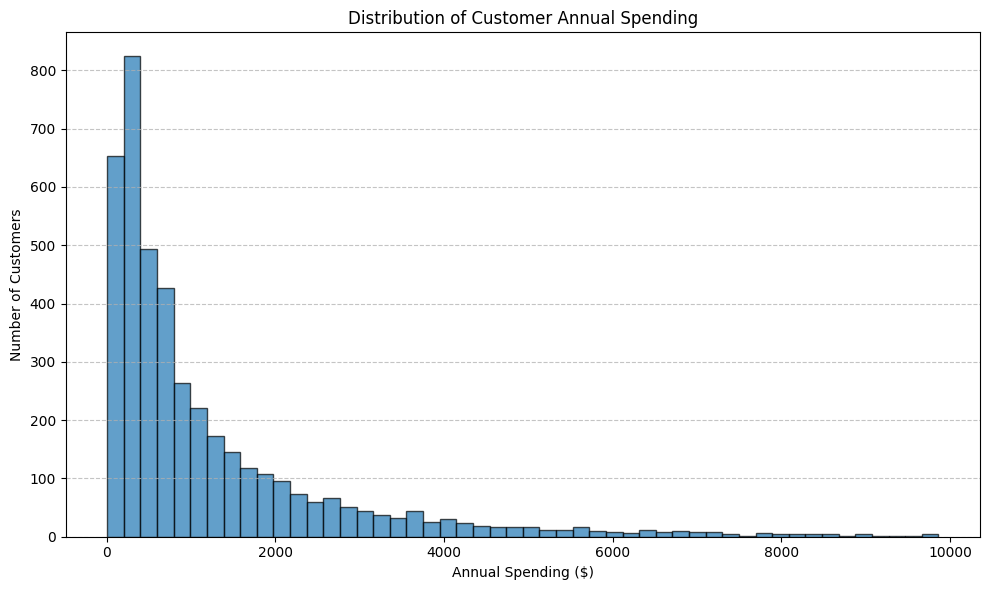

In [13]:
# Filter out anomalies to see main distribution
cust_trans_filt=cust_trans.loc[cust_trans['Sales']<10000]
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(cust_trans_filt, bins=50, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Annual Spending ($)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Annual Spending')

# Add grid for better readability
plt.grid(axis='y', alpha=0.75, linestyle='--')

plt.tight_layout()
plt.show()

# Products
### Little Birdie Paper craft is by far are the most popular item.

In [14]:
# Item quantity sold
# largest quantity of items sold
item_quant=transactions.groupby(['Description']).agg({'Quantity':'sum'}).reset_index()
item_quant=item_quant.sort_values('Quantity')
top_sales=item_quant.tail(10)
print(top_sales)

                             Description  Quantity
2047             MINI PAINT SET VINTAGE      26076
2656                  RABBIT NIGHT LIGHT     27202
2600                      POPCORN HOLDER     30931
2269     PACK OF 72 RETROSPOT CAKE CASES     33693
216        ASSORTED COLOUR BIRD ORNAMENT     35362
3698  WHITE HANGING HEART T-LIGHT HOLDER     36725
1762             JUMBO BAG RED RETROSPOT     46181
3786   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54415
1992      MEDIUM CERAMIC TOP STORAGE JAR     77916
2319         PAPER CRAFT , LITTLE BIRDIE     80995


# Transaction by country 
The Vast majority of transactions come from UK (91.5%)

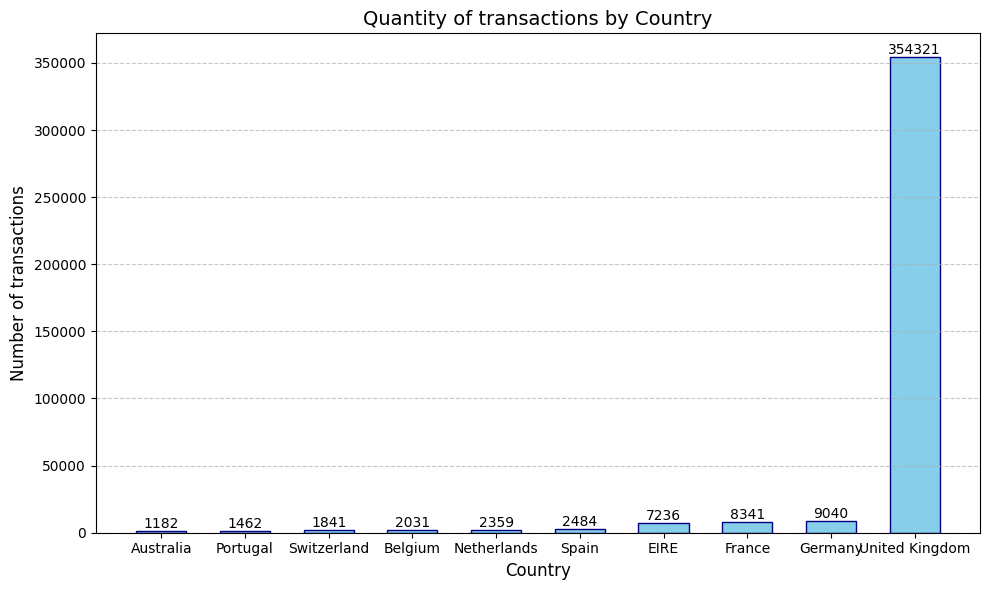

In [15]:
trans_by_country=transactions.groupby(['Country']).agg({'Country':'count'})
trans_by_country=trans_by_country.rename(columns={'Country':'Quantity'})
trans_ranks_count=trans_by_country.sort_values('Quantity').tail(10).reset_index()


plt.figure(figsize=(10, 6))
bars = plt.bar(height=trans_ranks_count['Quantity'],x=trans_ranks_count['Country'], color='skyblue', edgecolor='navy', width=0.6)

# Add title and labels
plt.title('Quantity of transactions by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of transactions', fontsize=12)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height}', ha='center', va='bottom')

# Add grid lines for the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize appearance
plt.tight_layout()
plt.show()

# 4. Building the Model



## 4a - Defining the structure and parameters of the model

This model aims to predict the future health and value of a customer over a specified time period (time to churn).
The output of these models will be used to:

            1. Predict who in the customer base is at risk of churning

            2. Sort the customers at risk by highest expected revenue
            
            3. Create marketing material based on the preferences of the customers at risk


We will define churn as a customer not having purchased a good for 90 days and set the targets accordingly.





In [16]:
n_days = 90
max_date=transactions['InvoiceDate'].max()
cutoff= max_date-pd.to_timedelta(n_days, unit="d")
 # train-test Split- temporal out df relates to the actual amount of expenditure in the next 90 days after the target date
print(cutoff)

2011-09-10 12:50:00


## Develop targets: 
Using the cutoff to create sales flags and filtering out customer ids which arent present before the cuttoff points, to create targets for the algorithm

In [17]:
temporal_in_df=transactions[transactions['InvoiceDate']< cutoff]
temporal_out_df=transactions[transactions['InvoiceDate'] >=cutoff].query('CustomerID in @temporal_in_df.CustomerID')
targets=temporal_out_df[['CustomerID','Sales']].groupby(['CustomerID']).sum().rename({'Sales':'Sales_90'},axis=1).assign(sales_90_flag=1)

# 4b. Create  Features 
RFM will be used as the basic features for the ML model as they have been proven to be important data points in predicting future customer behaviour  [[1]](#1)

Recency- when was the last time they made a purchase in days

Frequency- How many times did they purchase during the period

Monetary Values- What was the total monetary value they spent during the time and what is the average value of the the transactions

As RFM have known relationships between the future value of a customer we will use this as the basis for the ML. In the future we can develop further features which increase the relationship between historical data and the future value.

## Create Recency Features
Recency will be represented in two metrics 

1. Days since last purchase- last time a customer purchased minus the maximum amount of days during the period under analysis. Meaning the closer to zero a customer is the longer it has been since the last purchase. 


2. How many times has the customer purchased in the last 30 days

In [18]:
max_date=temporal_in_df['InvoiceDate'].max()
recency_features_df = temporal_in_df[['CustomerID','InvoiceDate']].groupby('CustomerID').apply(
    lambda x: int((max_date - x['InvoiceDate'].max())/pd.to_timedelta(1,"day"))
).to_frame()
recency_features_df=recency_features_df.rename(columns={0:'Recency'})
recency_features_df.head()

C:\Users\As-Pro\AppData\Local\Temp\ipykernel_14052\3237833438.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  recency_features_df = temporal_in_df[['CustomerID','InvoiceDate']].groupby('CustomerID').apply(


,Recency
CustomerID,
12346.0,234
12347.0,38
12348.0,157
12350.0,218
12352.0,170


In [19]:
max_date

Timestamp('2011-09-09 15:53:00')

In [20]:
(recency_features_df.loc[recency_features_df['Recency']==0]).count()

Recency    53
dtype: int64

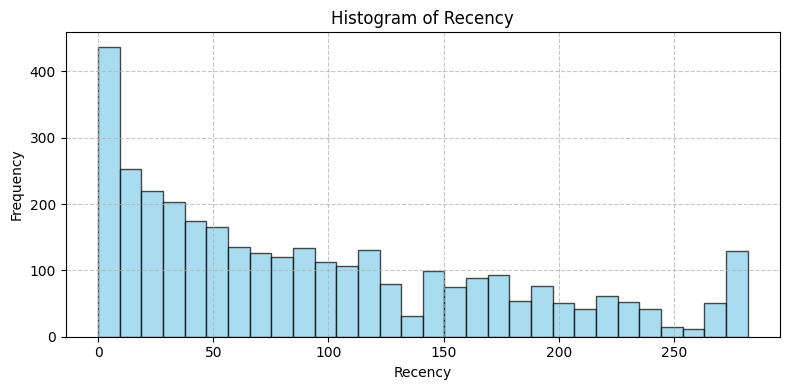

In [21]:
column_name = 'Recency'  # Replace with your actual column name

# Create the histogram
plt.figure(figsize=(8, 4))
plt.hist(recency_features_df[column_name], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

# How many times has a customer purchased in the last 30 days
This will be an added feature which will help develop the future probability of LTV. As a customer who has purchased within the last 14 days, is a greater 

Text(0.5, 1.0, 'Amount of sales in last 30 days by customer')

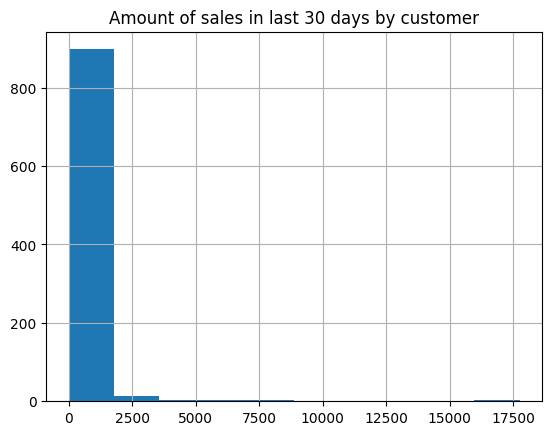

In [22]:
cut_off_m= cutoff-pd.to_timedelta(30,unit="d")

sales_last_month=temporal_in_df.query('InvoiceDate >= @cut_off_m')\
[['CustomerID','Sales']].drop_duplicates()\
.groupby('CustomerID')\
.sum()\
.set_axis(['sales_last_month'],axis=1).fillna(0)

sales_last_month.hist()
plt.title('Amount of sales in last 30 days by customer')

In [23]:
cut_off_m

Timestamp('2011-08-11 12:50:00')

Text(0.5, 1.0, 'Amount of sales in last 30 days by customer')

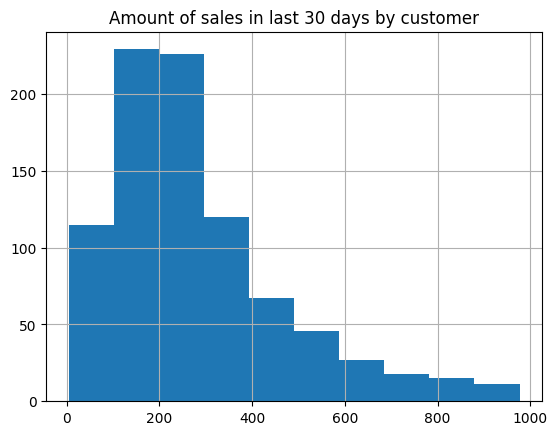

In [24]:
main_thirt=sales_last_month.loc[sales_last_month['sales_last_month']<1000]
main_thirt.set_axis(['sales_last_month'],axis=1).fillna(0)

main_thirt.hist()
plt.title('Amount of sales in last 30 days by customer')

In [25]:
print(sales_last_month.loc[sales_last_month['sales_last_month']>1000].count())
print(sales_last_month.max())

sales_last_month    48
dtype: int64
sales_last_month    17754.4
dtype: float64


# Frequency Features
The number of times in which they purchased over the period

In [26]:
frequency_features_df=temporal_in_df[['CustomerID','InvoiceDate']].groupby('CustomerID').count()
frequency_features_df=frequency_features_df.rename(columns={'InvoiceDate':'Frequency'})
frequency_features_df.head()

,Frequency
CustomerID,
12346.0,1
12347.0,124
12348.0,28
12350.0,17
12352.0,38


In [27]:
frequency_features_df.max()

Frequency    4490
dtype: int64

In [28]:
frequency_features_df.max()


Frequency    4490
dtype: int64

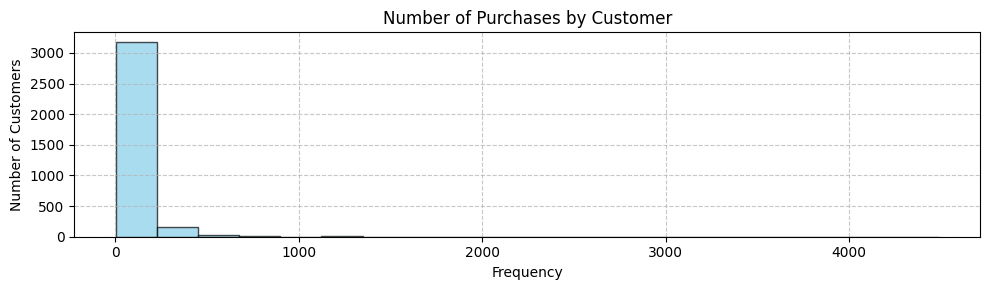

In [29]:
# Create a figure with subplots for each column
fig, axes = plt.subplots(nrows=len(frequency_features_df.columns), figsize=(10, 3*len(frequency_features_df.columns)))

# If there's only one column, axes will not be an array
if len(frequency_features_df.columns) == 1:
    axes = [axes]

# Plot histogram for each column
for i, column in enumerate(frequency_features_df.columns):
    axes[i].hist(frequency_features_df[column], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Number of Purchases by Customer')
    axes[i].set_xlabel('Frequency')
    axes[i].set_ylabel('Number of Customers')
    axes[i].grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

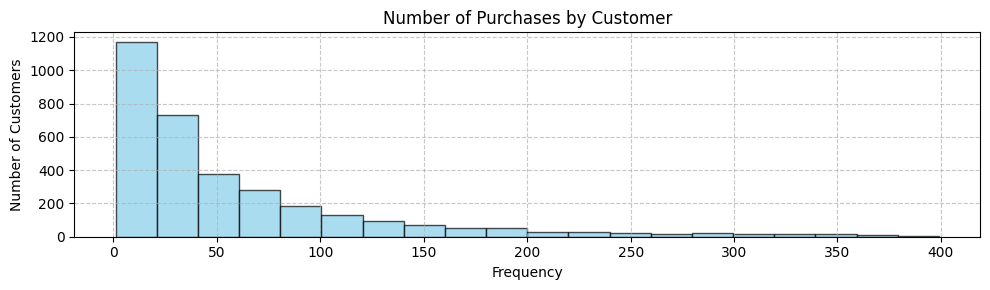

In [30]:
frequency_features_main=frequency_features_df.loc[frequency_features_df['Frequency']<400]

# Create a figure with subplots for each column
fig, axes = plt.subplots(nrows=len(frequency_features_main.columns), figsize=(10, 3*len(frequency_features_main.columns)))

# If there's only one column, axes will not be an array
if len(frequency_features_main.columns) == 1:
    axes = [axes]

# Plot histogram for each column
for i, column in enumerate(frequency_features_main.columns):
    axes[i].hist(frequency_features_main[column], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title('Number of Purchases by Customer')
    axes[i].set_xlabel('Frequency')
    axes[i].set_ylabel('Number of Customers')
    axes[i].grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Monetary Value Features
- The average sale of each transactions and the total sales during the period of historical sales


In [31]:
monetary_features=temporal_in_df.groupby(['CustomerID']).agg({'Sales':['sum','mean']}).set_axis(['sales_value_sum','sales_values_mean'],axis=1)
print(monetary_features)

            sales_value_sum  sales_values_mean
CustomerID                                    
12346.0            77183.60       77183.600000
12347.0             2790.86          22.506935
12348.0             1487.24          53.115714
12350.0              334.40          19.670588
12352.0             1561.81          41.100263
...                     ...                ...
18280.0              180.60          18.060000
18281.0               80.82          11.545714
18282.0              100.21          14.315714
18283.0             1120.67           2.507092
18287.0              765.28          26.388966

[3370 rows x 2 columns]


# Concatinate all the features into the singular dataframe and merge in the targets

In [32]:
features=pd.concat([recency_features_df, frequency_features_df, monetary_features,sales_last_month],axis=1)
features['sales_last_month']=features['sales_last_month'].fillna(0)
features=features.merge(targets,how='left',left_index=True,right_index=True)
features['Sales_90']=features['Sales_90'].fillna(0)
features['sales_90_flag']=features['sales_90_flag'].fillna(0)
features.head()

,Recency,Frequency,sales_value_sum,sales_values_mean,sales_last_month,Sales_90,sales_90_flag
CustomerID,,,,,,,
12346.0,234,1,77183.60,77183.600000,0.0,0.00,0.0
12347.0,38,124,2790.86,22.506935,0.0,1519.14,1.0
12348.0,157,28,1487.24,53.115714,0.0,310.00,1.0
12350.0,218,17,334.40,19.670588,0.0,0.00,0.0
12352.0,170,38,1561.81,41.100263,0.0,944.23,1.0


# Proving relationship between the features and churn

12348.0


### Hypothesis: Recency and Churn

The hypothesis is that customers who made a purchase more recently are less likely to churn. This is based on the assumption that the more recent the purchase, the lower the likelihood of external factors—such as shifting market dynamics, changes in the product catalogue, or supplier switches—disrupting their demand.

### Analysis

The boxplot below supports this hypothesis, showing that customers who **did not churn** (i.e., made a purchase within the last 90 days) had, on average, a more recent purchase date than those who **did churn**. This suggests that **recency** is a strong indicator of churn likelihood.

### Statistical Validation

This relationship is further validated by a **one-way ANOVA test**, which returned a **p-value near zero**—indicating a **statistically significant difference** in average recency between churned and non-churned customers.



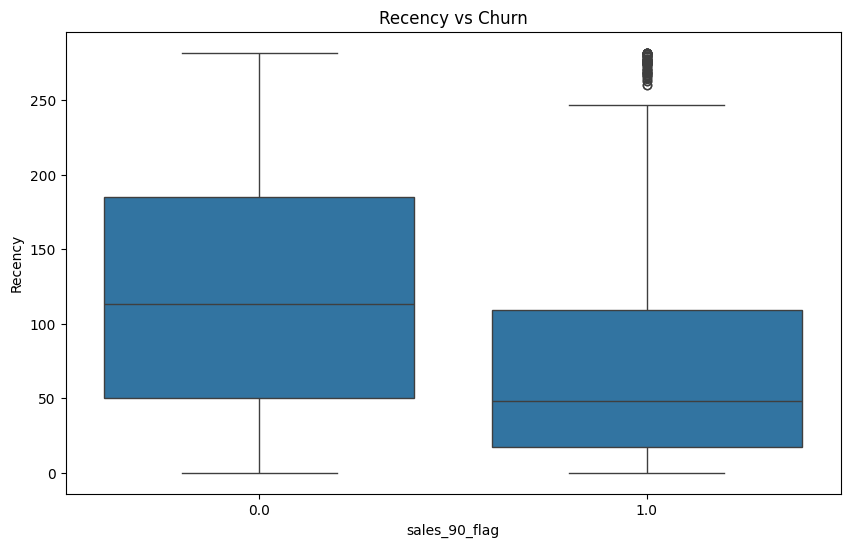

In [33]:

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sales_90_flag', y='Recency', data=features)
plt.title('Recency vs Churn')
plt.show()

In [34]:
# Assuming df has your data with 'category_col' and 'continuous_col'
categories = features['sales_90_flag'].unique()
data_by_category = [features[features['sales_90_flag'] == cat]['Recency'] for cat in categories]

# One-way ANOVA
f_stat, p_value = stats.f_oneway(*data_by_category)
print(f"F-statistic: {f_stat}, p-value: {p_value}")

F-statistic: 346.42071965401317, p-value: 1.1222971664044166e-73


### Frequency

### Hypothesis

We hypothesize that customers with higher purchase frequency are less likely to churn. The rationale is that frequent purchases may indicate a stronger habit and greater dependency on the supplier, making churn less likely.

### Analysis

The boxplot below shows that customers who did **not** churn have a **higher median purchase frequency** compared to those who did. This supports the idea that frequency is a meaningful indicator of churn behavior.

### Statistical Validation

The p-value from the statistical test comparing frequency and 90-day churn is **very low**, indicating a **strong relationship** between purchase frequency and churn likelihood. In other words, it's highly probable that these two variables are related.

In [35]:
# Assuming df has your data with 'category_col' and 'continuous_col'
categories = features['sales_90_flag'].unique()
data_by_category = [features[features['sales_90_flag'] == cat]['Frequency'] for cat in categories]

# One-way ANOVA
f_stat, p_value = stats.f_oneway(*data_by_category)
print(f"F-statistic: {f_stat}, p-value: {p_value}")

F-statistic: 164.26782891205553, p-value: 9.42216248723352e-37


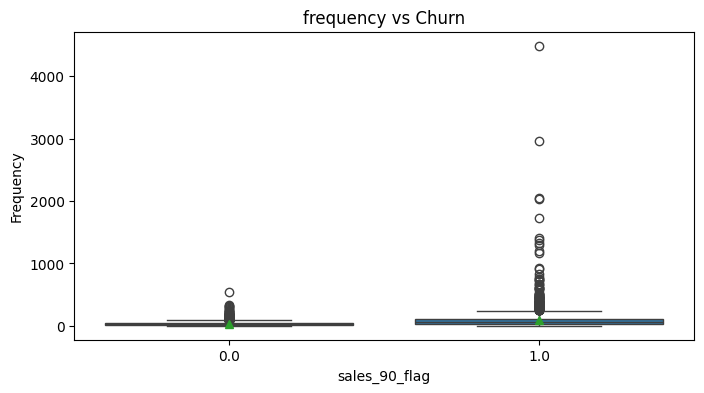

In [36]:
# Create box plot
plt.figure(figsize=(8,4))
sns.boxplot(x='sales_90_flag', y='Frequency', data=features,showmeans=True)
plt.title('frequency vs Churn')
plt.show()

## Datasplitting between training and testing with a 80/ 20  split

In [37]:
x=features.drop(columns=['Sales_90','sales_90_flag'])
y=features[['Sales_90']]

x=x.loc[x.index != 14646.0]
y=y.loc[y.index != 14646.0]

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=.2)

# Testing the accuracy of the model to  predict the monetary values of customers future purchases

RMSE is calculated as the total error observed and devided by the number of datapoints and then square rooted 

Text(0.5, 1.0, 'Total Sales vs Sales Over Quarter')

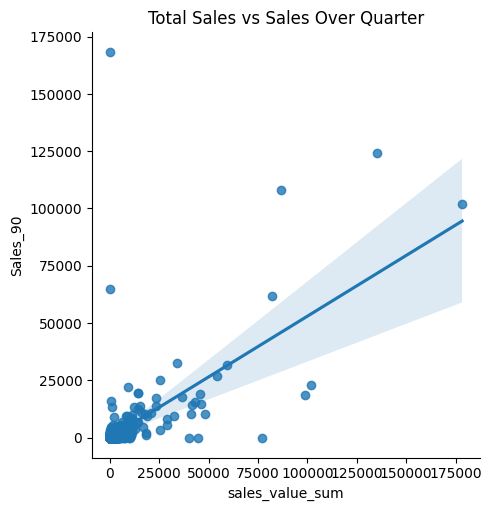

In [38]:

ax=sns.lmplot(x='sales_value_sum',y='Sales_90',data=features)
ax = plt.gca()
ax.set_title("Total Sales vs Sales Over Quarter")

In [39]:

model = LinearRegression()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)



In [40]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 9028.571640435226


In [41]:
y_pred

array([[ 1.27187854e+02],
       [ 4.36404654e+02],
       [ 4.87783185e+02],
       [ 1.44691120e+03],
       [ 3.87307371e+01],
       [ 1.62431442e+02],
       [ 5.13355846e+02],
       [ 1.03008787e+03],
       [ 5.09960766e+02],
       [ 1.05795255e+02],
       [-1.74948986e+02],
       [ 9.79526655e+01],
       [ 1.65034121e+02],
       [ 1.35261991e+03],
       [ 1.79983054e+02],
       [ 1.88943548e+02],
       [-5.74187179e+01],
       [ 2.96573209e+02],
       [ 9.01436245e+02],
       [ 2.48945191e+03],
       [-1.81089812e+01],
       [ 3.70224149e+02],
       [ 7.09703657e+00],
       [ 4.00307722e+02],
       [ 8.64781957e+03],
       [ 5.79942016e+02],
       [ 5.88864306e+02],
       [ 3.77911836e+03],
       [ 2.30585077e+02],
       [ 2.41730215e+03],
       [ 9.99127548e+01],
       [ 8.69938187e+02],
       [ 2.50989443e+02],
       [ 5.91075801e+01],
       [ 1.11277616e+03],
       [ 7.32003155e+01],
       [ 1.28855660e+01],
       [ 4.68632328e+01],
       [ 1.0

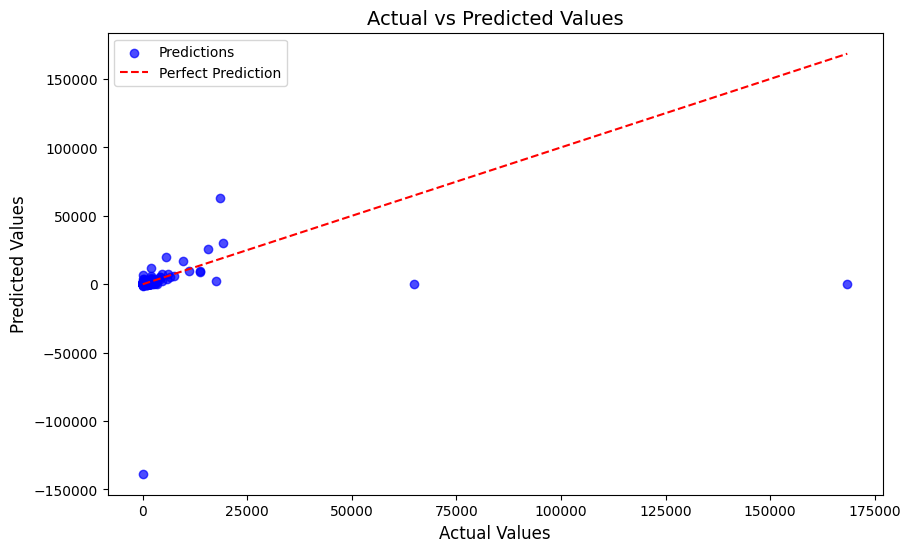

In [42]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predictions')

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color='red', 
         linestyle='--', 
         label='Perfect Prediction')

# Plot styling
plt.title('Actual vs Predicted Values', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend()

In [43]:
predicted_quarterly_revenue=int(y_pred.sum())
print(predicted_quarterly_revenue)

385967


# Testing the accuracy of predicting whether customers churn or not using logistical regression

In [44]:

x=features.drop(columns=['Sales_90','sales_90_flag'])
i=features[['sales_90_flag']]



i_train,i_test,x_train,x_test=train_test_split(i,x,random_state=100,test_size=.2)

print(i.shape)
print(x.shape)

(3370, 1)
(3370, 5)


## Comparing different logistical models

In [45]:
logreg = LogisticRegression(random_state=16)
logreg.fit(x_train,i_train)
logreg_pred = logreg.predict(x_test)

target_names = ['churned', 'did not churn']
print(classification_report(i_test, logreg_pred, target_names=target_names))

               precision    recall  f1-score   support

      churned       0.59      0.60      0.59       279
did not churn       0.71      0.71      0.71       395

     accuracy                           0.66       674
    macro avg       0.65      0.65      0.65       674
 weighted avg       0.66      0.66      0.66       674



C:\Users\As-Pro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [46]:
# liblinear solver
logreg_liblinear = LogisticRegression(solver='liblinear',random_state=42)
logreg_liblinear.fit(x_train,i_train)
lib_pred = logreg_liblinear.predict(x_test)


target_names = ['churned', 'did not churn']
print(classification_report(i_test, lib_pred, target_names=target_names))

C:\Users\As-Pro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


               precision    recall  f1-score   support

      churned       0.59      0.62      0.60       279
did not churn       0.72      0.69      0.71       395

     accuracy                           0.66       674
    macro avg       0.65      0.66      0.65       674
 weighted avg       0.66      0.66      0.66       674



In [47]:
# Saga Solver
lr_elastic = LogisticRegression(solver='saga', random_state=42)
lr_elastic.fit(x_train,i_train)
elasticnet = lr_elastic.predict(x_test)
target_names = ['churned', 'did not churn']
print(classification_report(i_test, elasticnet, target_names=target_names))

C:\Users\As-Pro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


               precision    recall  f1-score   support

      churned       0.59      0.04      0.07       279
did not churn       0.59      0.98      0.74       395

     accuracy                           0.59       674
    macro avg       0.59      0.51      0.40       674
 weighted avg       0.59      0.59      0.46       674



C:\Users\As-Pro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [48]:
# Newton cg solver
lr_newton = LogisticRegression(solver='newton-cg', random_state=42)
lr_newton.fit(x_train,i_train)
newt_pred = lr_newton.predict(x_test)
target_names = ['churned', 'did not churn']
print(classification_report(i_test, newt_pred, target_names=target_names))


C:\Users\As-Pro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


               precision    recall  f1-score   support

      churned       0.59      0.60      0.59       279
did not churn       0.71      0.71      0.71       395

     accuracy                           0.66       674
    macro avg       0.65      0.65      0.65       674
 weighted avg       0.66      0.66      0.66       674



In [49]:
# Using the sag solver
lr_sag = LogisticRegression(solver='sag', random_state=42)
lr_sag.fit(x_train, i_train)
lr_sag=lr_sag.predict(x_test)
target_names = ['churned', 'did not churn']
print(classification_report(i_test, lr_sag, target_names=target_names))

C:\Users\As-Pro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


               precision    recall  f1-score   support

      churned       0.66      0.17      0.27       279
did not churn       0.62      0.94      0.74       395

     accuracy                           0.62       674
    macro avg       0.64      0.55      0.51       674
 weighted avg       0.63      0.62      0.55       674



C:\Users\As-Pro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


The major cost for the a company is a customer churning, which hadnt been predicted to churn. Therefore the true benefit of the model is based on the recall which are the true positives, which is calculated to be at 75%. As due to the strategy of small targetted discounts, true negatives only have a small cost associated with the intervention.

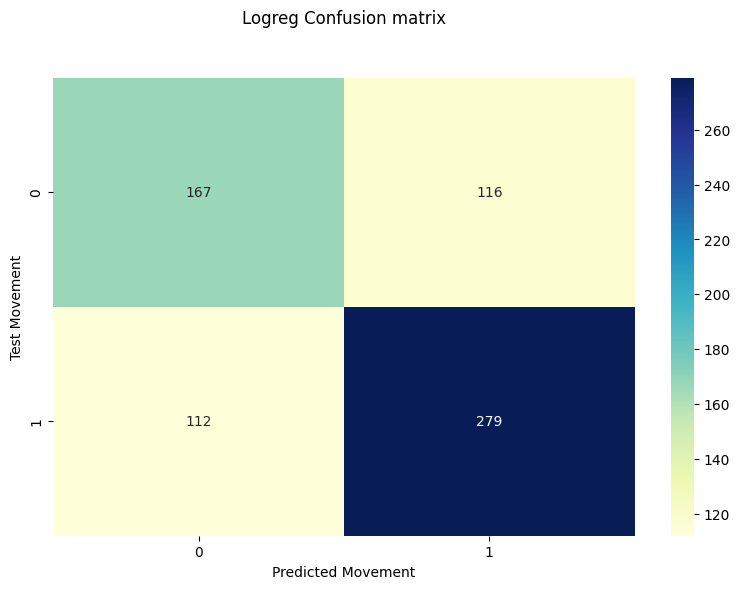

Confusion Matrix:
[[167 116]
 [112 279]]


In [50]:
# Generate the confusion matrix
cnf_matrix = confusion_matrix(logreg_pred, i_test)

# Define class names
class_names = ['Not Churned', 'Churned']  # name of classes

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Set tick marks and labels
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# Adjust axis labels
ax.xaxis.set_label_position("bottom")

# Add labels and title
plt.title('Logreg Confusion matrix', y=1.1)
plt.ylabel('Test Movement')
plt.xlabel('Predicted Movement')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

# Print confusion matrix values for reference
print("Confusion Matrix:")
print(cnf_matrix)


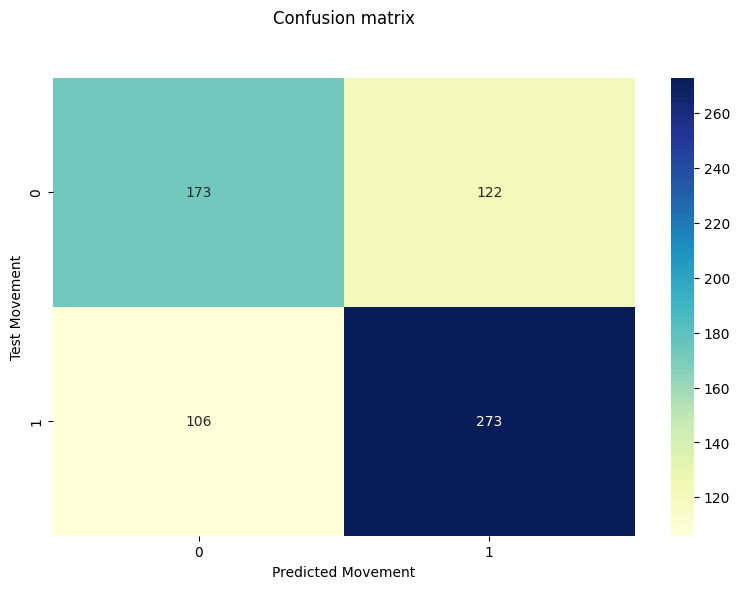

Confusion Matrix:
[[173 122]
 [106 273]]


In [51]:
# Generate the confusion matrix
cnf_matrix = confusion_matrix(lib_pred, i_test)

# Define class names
class_names = ['Not Churned', 'Churned']  # name of classes

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Set tick marks and labels
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# Adjust axis labels
ax.xaxis.set_label_position("bottom")

# Add labels and title
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Test Movement')
plt.xlabel('Predicted Movement')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

# Print confusion matrix values for reference
print("Confusion Matrix:")
print(cnf_matrix)

# Application of model to all data
The chosen Logreg liblinear model will now be applied to the whole dataset

In [52]:
features_total=features.copy()


In [53]:
x_total=features_total.drop(columns=['Sales_90','sales_90_flag'])
y_total=features_total['sales_90_flag']
i_total=features_total['Sales_90']
y_pred = logreg_liblinear.predict(x_total)

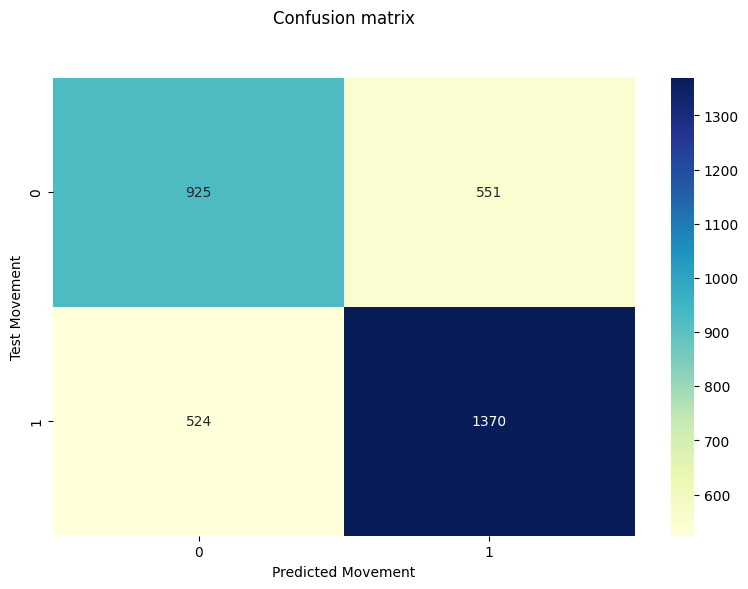

In [54]:
# Generate the confusion matrix
cnf_matrix = confusion_matrix(y_pred, y_total)

# Define class names
class_names = ['Not Churned', 'Churned']  # name of classes

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Set tick marks and labels
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')

# Adjust axis labels
ax.xaxis.set_label_position("bottom")

# Add labels and title
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Test Movement')
plt.xlabel('Predicted Movement')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


In [55]:
target_names = ['did not spend', 'spend']
print(classification_report(y_total, y_pred, target_names=target_names))


               precision    recall  f1-score   support

did not spend       0.63      0.64      0.63      1449
        spend       0.72      0.71      0.72      1921

     accuracy                           0.68      3370
    macro avg       0.68      0.68      0.68      3370
 weighted avg       0.68      0.68      0.68      3370



In [56]:
features_total=features_total.reset_index()

In [57]:
y_pred=pd.DataFrame(y_pred)
y_pred=y_pred.rename(columns={0:'PREDICTED_SALES'})
features_total=pd.merge(features_total,y_pred,left_index=True, right_index=True)

In [58]:

y_pred = model.predict(x_total)
y_pred=pd.DataFrame(y_pred)
predicted_spend=y_pred.rename(columns={0:'PREDICTED_SPEND'})
features_total=pd.merge(features_total,predicted_spend,left_index=True, right_index=True)
features_total.head()


,CustomerID,Recency,Frequency,sales_value_sum,sales_values_mean,sales_last_month,Sales_90,sales_90_flag,PREDICTED_SALES,PREDICTED_SPEND
0,12346.0,234,1,77183.60,77183.600000,0.0,0.00,0.0,0.0,-138488.219815
1,12347.0,38,124,2790.86,22.506935,0.0,1519.14,1.0,1.0,1645.474254
2,12348.0,157,28,1487.24,53.115714,0.0,310.00,1.0,1.0,925.809061
3,12350.0,218,17,334.40,19.670588,0.0,0.00,0.0,0.0,195.975424
4,12352.0,170,38,1561.81,41.100263,0.0,944.23,1.0,1.0,984.125619


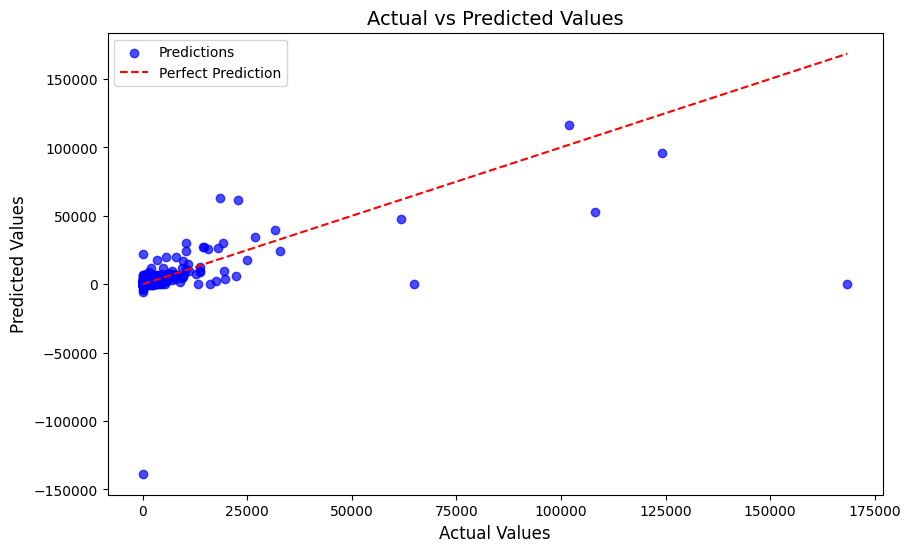

In [59]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(i_total, y_pred, alpha=0.7, color='blue', label='Predictions')

# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color='red', 
         linestyle='--', 
         label='Perfect Prediction')

# Plot styling
plt.title('Actual vs Predicted Values', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend()

# Evaluating benefit of model 

## Business case for targetting of customers
        1. Find biggest customers who are expected to churn 
        2. Calculate the estimated cost of saving promotion- including 

In [60]:
pred_churn_pop=features_total.loc[features_total['PREDICTED_SALES']==0].sort_values(by=['PREDICTED_SPEND'],ascending=False)
pred_churn_pop=pred_churn_pop.loc[features_total['PREDICTED_SPEND']>0]
pred_churn_pop.head()

,CustomerID,Recency,Frequency,sales_value_sum,sales_values_mean,sales_last_month,Sales_90,sales_90_flag,PREDICTED_SALES,PREDICTED_SPEND
264,12764.0,225,45,1693.88,37.641778,0.0,0.0,0.0,0.0,1084.840474
1740,15332.0,275,35,1661.06,47.458857,0.0,0.0,0.0,0.0,1080.614024
372,12967.0,266,19,1660.90,87.415789,0.0,0.0,0.0,0.0,1027.284335
1570,15057.0,184,25,1489.50,59.580000,0.0,0.0,0.0,0.0,927.937960
1507,14935.0,206,10,1784.71,178.471000,0.0,0.0,0.0,0.0,900.860584


### Due to the discount based on percentage spend and the low cost associated with automated email messages as

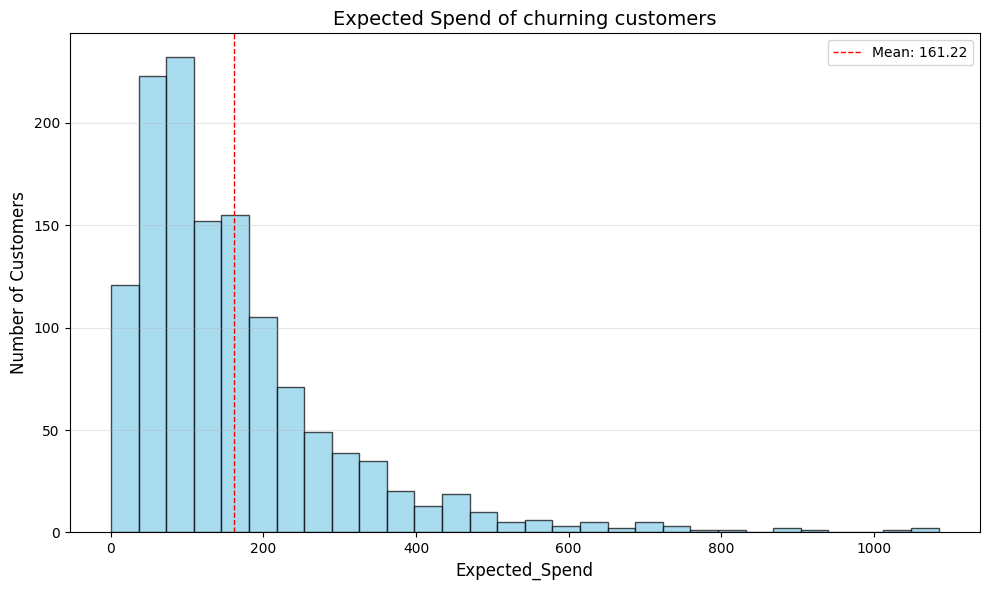

In [61]:
pred_spend=pred_churn_pop['PREDICTED_SPEND']

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Create the histogram
plt.hist(pred_spend, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Expected_Spend', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Expected Spend of churning customers', fontsize=14)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Add a vertical line at the mean
plt.axvline(pred_spend.mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {pred_spend.mean():.2f}')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# The Marketing Campaign

The campaign will target customers who are predicted to churn by offering them small but specific discounts (e.g., 8%) on their three largest previous purchases. Research indicates that such promotions increase customer repurchase intentions by 13 to 21% [[2]](#2) by creating a sense of urgency and encouraging larger order quantities.
These targeted discounts are expected to reduce churn through:

#### > Building customer goodwill
#### > Decreasing intervals between purchases, which reinforces habitual buying behavior

The estimated cost of the marketing program is calculated by multiplying the discount rate by the expected customer spend, totaling $21,469.6464. However, two important factors must be considered:

Approximately 34% of predicted churning customers will be misidentified, meaning about one-third of these discounts will be given to customers who would have stayed regardless.

The cost of these discounts should be offset by increased revenue from retained customers and their subsequent repeat purchases. This however will would be impossible to predict therefore this programme should be run on a continual basis to better understand the impacts on customer retention and changing purchasing behaviour.


[^2]:Harvard Business Review, June 7, 2024.  From the article, “Research: Smaller, More Precise Discounts Could Increase Your Sale

In [62]:
pred_churn_pop

,CustomerID,Recency,Frequency,sales_value_sum,sales_values_mean,sales_last_month,Sales_90,sales_90_flag,PREDICTED_SALES,PREDICTED_SPEND
264,12764.0,225,45,1693.88,37.641778,0.0,0.00,0.0,0.0,1084.840474
1740,15332.0,275,35,1661.06,47.458857,0.0,0.00,0.0,0.0,1080.614024
372,12967.0,266,19,1660.90,87.415789,0.0,0.00,0.0,0.0,1027.284335
1570,15057.0,184,25,1489.50,59.580000,0.0,0.00,0.0,0.0,927.937960
1507,14935.0,206,10,1784.71,178.471000,0.0,0.00,0.0,0.0,900.860584
...,...,...,...,...,...,...,...,...,...,...
100,12506.0,141,23,73.50,3.195652,0.0,0.00,0.0,0.0,1.774616
2049,15901.0,63,24,110.49,4.603750,0.0,253.39,1.0,0.0,1.628450
2215,16205.0,88,27,112.35,4.161111,0.0,649.03,1.0,0.0,1.381575
781,13682.0,96,3,59.50,19.833333,0.0,0.00,0.0,0.0,0.399288


In [63]:
churn_id=pred_churn_pop['CustomerID'].astype(int)
trans_churn=transactions.loc[transactions['CustomerID'].isin(churn_id)]
trans_churn=trans_churn[['CustomerID','StockCode','Description','Sales']]
trans_churn=trans_churn.groupby(['CustomerID','StockCode','Description']).agg(sum)

result_alt = (trans_churn.sort_values(['CustomerID','StockCode','Description', 'Sales'], ascending=[True,True,True, False])
               .groupby('CustomerID')
               .head(3)
               .reset_index())

print("\nAlternative method result:")


result_alt.head()



Alternative method result:


C:\Users\As-Pro\AppData\Local\Temp\ipykernel_14052\2597230401.py:4: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  trans_churn=trans_churn.groupby(['CustomerID','StockCode','Description']).agg(sum)


,CustomerID,StockCode,Description,Sales
0,12350.0,20615,BLUE POLKADOT PASSPORT COVER,25.2
1,12350.0,20652,BLUE POLKADOT LUGGAGE TAG,15.0
2,12350.0,21171,BATHROOM METAL SIGN,17.4
3,12353.0,22890,NOVELTY BISCUITS CAKE STAND 3 TIER,39.8
4,12353.0,37446,MINI CAKE STAND WITH HANGING CAKES,11.6


In [64]:
total_sales=result_alt['Sales'].sum()
print("Total Sales of predicted churn population ", total_sales)

total_discount_amount=total_sales*.08

misallocated_discounts = total_discount_amount * .34

print("Total lost revenue from discount (8%)", total_discount_amount)

print("misallocated discounts",misallocated_discounts)

Total Sales of predicted churn population  268370.58
Total lost revenue from discount (8%) 21469.6464
misallocated discounts 7299.679776000001


# Review and Review

To increase the accuracy of the algorthim if there was an ability to attach more customer data to the transactional data this would allow more accuracy in predicting which customers would churn.

In [65]:
total_sales*.07

np.float64(18785.9406)

<a id="1">[1]</a>: Fader, Peter S., Bruce G. S. Hardie, and Paul D. Berger (2004),
“Customer-Base Analysis with Discrete-Time Transaction Data,”
unpublished working paper.
———, ———, and Ka Lok Lee (2005), “RFM and CLV: Using IsoCLV Curves for Customer Base Analysis,” Journal of Marketing
Research, 42 (November), 415-30


<a id="2">[2]</a>:Harvard Business Review, June 7, 2024.  From the article, “Research: Smaller, More Precise Discounts Could Increase Your Sale